In [7]:
#----------START----------#

In [8]:
print('Start')

Start


In [9]:
import requests
import json

# Prompt the user to enter the league ID
league_id = input("Enter league ID: ")

# Format the URL string with the league ID
url = f"https://draft.premierleague.com/api/league/{league_id}/details"

# Make the GET request and load the response data as a Python object
response = requests.get(url)
content_obj = json.loads(response.content)

# Print the content object
print(content_obj)


# Make a GET request and load the response data as a Python object
#response = requests.get('https://draft.premierleague.com/api/league/69638/details')
#content_obj = json.loads(response.content)

# Create empty lists to store unique league entries
unique_league_entries = []

# Loop through the 'matches' list and extract the league entry values for event 1
for match in content_obj['matches']:
    if match['event'] == 1:
        league_entry_1 = match['league_entry_1']
        league_entry_2 = match['league_entry_2']

        # Add the league entry values to the unique_league_entries list if they're not already in the list
        if league_entry_1 not in unique_league_entries:
            unique_league_entries.append(league_entry_1)
        if league_entry_2 not in unique_league_entries:
            unique_league_entries.append(league_entry_2)

# Print the unique_league_entries list
#print(unique_league_entries)


Enter league ID: 41583
{'league': {'admin_entry': 151971, 'closed': True, 'draft_dt': '2023-07-29T19:15:00Z', 'draft_pick_time_limit': 90, 'draft_status': 'post', 'draft_tz_show': 'Europe/London', 'id': 41583, 'ko_rounds': 0, 'make_code_public': False, 'max_entries': 6, 'min_entries': 6, 'name': 'Ke', 'scoring': 'h', 'start_event': 1, 'stop_event': 38, 'trades': 'y', 'transaction_mode': 'free-agency', 'variety': 'x'}, 'league_entries': [{'entry_id': 151971, 'entry_name': 'MurderOnZidanesFloor', 'id': 152488, 'joined_time': '2023-07-28T15:41:48.112256Z', 'player_first_name': 'Chris', 'player_last_name': 'Hudson', 'short_name': 'CH', 'waiver_pick': 2}, {'entry_id': 151996, 'entry_name': 'LlorisTheHounds', 'id': 152513, 'joined_time': '2023-07-28T15:44:29.862445Z', 'player_first_name': 'Nathan', 'player_last_name': 'Leversedge', 'short_name': 'NL', 'waiver_pick': 4}, {'entry_id': 152037, 'entry_name': 'Is Your Motherwell?', 'id': 152554, 'joined_time': '2023-07-28T15:48:30.594061Z', 'play

In [10]:
import json
import requests

# Make a GET request and load the response data as a Python object
response = requests.get('https://draft.premierleague.com/api/league/41583/details')

if response.status_code == 200:  # Check if the request was successful
    content_obj = json.loads(response.content)
    
    if 'league_entries' in content_obj:  # Check if 'league_entries' exists
        entry_names = [entry['entry_name'] for entry in content_obj['league_entries']]
        
        print("Entry Names:")
        print(entry_names)
    else:
        print("The 'league_entries' field does not exist.")
        
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


Entry Names:
['MurderOnZidanesFloor', 'LlorisTheHounds', 'Is Your Motherwell?', 'Show Me Da Mane🏥', 'Kloppenheimer', 'Backstreet Moyes']


In [11]:
import pandas as pd
import random
from timeit import default_timer as timer
from copy import deepcopy
pd.set_option('display.max_columns',None)

total_position = [[0,0,0,0,0,0]]
total_position = pd.DataFrame(total_position, columns = entry_names)
xPoints = [[0,0,0,0,0,0]]
xPoints = pd.DataFrame(xPoints, columns = entry_names)
times_in_position = [[entry_names[0],0,0,0,0,0,0],
                     [entry_names[1],0,0,0,0,0,0],
                     [entry_names[2],0,0,0,0,0,0],
                     [entry_names[3],0,0,0,0,0,0],
                     [entry_names[4],0,0,0,0,0,0],
                     [entry_names[5],0,0,0,0,0,0]]
times_in_position = pd.DataFrame(times_in_position, columns = ['Team','1st','2nd','3rd','4th','5th','6th'])



In [12]:
# Create an empty list to store the data
data = []

# Find the highest event number where 'finished' is True
highest_event_num = max([match['event'] for match in content_obj['matches'] if match['finished']])

# Get the list of unique entry names
entry_names = [entry['entry_name'] for entry in content_obj['league_entries']]
unique_league_entries = []
for match in content_obj['matches']:
    if match['event'] == 1:
        league_entry_1 = match['league_entry_1']
        league_entry_2 = match['league_entry_2']

        if league_entry_1 not in unique_league_entries:
            unique_league_entries.append(league_entry_1)
        if league_entry_2 not in unique_league_entries:
            unique_league_entries.append(league_entry_2)

# Find the league entry IDs for each entry name
entry_ids = [None] * len(entry_names)
for i, entry_name in enumerate(entry_names):
    for entry in content_obj['league_entries']:
        if entry['entry_name'] == entry_name:
            entry_ids[i] = entry['id']
            break

# Loop through each event up to the highest event number where 'finished' is True
for event_num in range(1, highest_event_num + 1):
    # Create a new list to store the data for this event
    event_data = [event_num] + [0]*len(entry_names)

    # Loop through the matches for this event and update the event_data list
    for match in content_obj['matches']:
        if match['event'] == event_num and match['finished']:
            for i, entry_id in enumerate(entry_ids):
                if match['league_entry_1'] == entry_id:
                    event_data[i+1] = match.get('league_entry_1_points', match.get('league_entry_2_points', 0))
                elif match['league_entry_2'] == entry_id:
                    event_data[i+1] = match.get('league_entry_2_points', match.get('league_entry_1_points', 0))

    # Add the event_data list to the data list
    data.append(event_data)

# Print the data list
print(data)


[[1, 41, 64, 39, 44, 49, 39], [2, 40, 60, 51, 44, 22, 44], [3, 43, 46, 47, 48, 61, 27], [4, 45, 41, 50, 55, 61, 51]]


In [13]:
finished_events = [match['event'] for match in content_obj['matches'] if match['finished']]
played_gameweeks = set(finished_events)
played_gameweeks = list(played_gameweeks) # convert set back to list if needed

fixtures_h_a = []
for i, week in enumerate(sorted(played_gameweeks)):
    fixtures_h_a.append(f"{week}h")
    fixtures_h_a.append(f"{week}a")
    
fixtures_h_a


['1h', '1a', '2h', '2a', '3h', '3a', '4h', '4a']

In [14]:
global points_per_run
points_per_run = {player: [] for player in entry_names}



def players(u,v,w,x,y,z):
    list = []
    list.append(u)
    list.append(v)
    list.append(w)
    list.append(x)
    list.append(y)
    list.append(z)
    a=list[random.randint(0,5)]
    list.remove(a)
    b=list[random.randint(0,4)]
    list.remove(b)
    c=list[random.randint(0,3)]
    list.remove(c)
    d=list[random.randint(0,2)]
    list.remove(d)
    e=list[random.randint(0,1)]
    list.remove(e)
    f=list[0]
    list.remove(f)
    def fixture_list(a,b,c,d,e,f):
        fixtures = [[a,b,a,c,a,d,a,e,a,f,a,b,a,c,a,d,a,e,a,f,a,b,a,c,a,d,a,e,a,f,a,b,a,c,a,d,a,e,a,f,a,b,a,c,a,d,a,e,a,f,a,b,a,c,a,d,a,e,a,f,a,b,a,c,a,d,a,e,a,f,a,b,a,c,a,d,a,e,a,f,a,b,a,c,a,d,a,e,a,f,a,b,a,c,a,d,a,e,a,f,a,b,a,c,a,d],
                    [c,d,e,b,c,e,c,f,c,b,c,d,e,b,c,e,c,f,c,b,c,d,e,b,c,e,c,f,c,b,c,d,e,b,c,e,c,f,c,b,c,d,e,b,c,e,c,f,c,b,c,d,e,b,c,e,c,f,c,b,c,d,e,b,c,e,c,f,c,b,c,d,e,b,c,e,c,f,c,b,c,d,e,b,c,e,c,f,c,b,c,d,e,b,c,e,c,f,c,b,c,d,e,b,c,e],
                    [e,f,d,f,b,f,b,d,e,d,e,f,d,f,b,f,b,d,e,d,e,f,d,f,b,f,b,d,e,d,e,f,d,f,b,f,b,d,e,d,e,f,d,f,b,f,b,d,e,d,e,f,d,f,b,f,b,d,e,d,e,f,d,f,b,f,b,d,e,d,e,f,d,f,b,f,b,d,e,d,e,f,d,f,b,f,b,d,e,d,e,f,d,f,b,f,b,d,e,d,e,f,d,f,b,f]]
        n = len(fixtures_h_a)
        fixtures = [lst[:n] for lst in fixtures]
        global fixtures_df
        fixtures_df = pd.DataFrame(fixtures, columns = fixtures_h_a)
    fixture_list(a,b,c,d,e,f)
    global data
    global results
    global points
    global position
    results = pd.DataFrame(data, columns = ['Gameweek'] + entry_names)
    points = [[0,0,0,0,0,0]]
    points = pd.DataFrame(points, columns = entry_names)
    for j in range(0,(int(len(fixtures_h_a)/2))):
        for i in range(0,3):
            if results.loc[j,fixtures_df.iloc[i,j*2]] > results.loc[j,fixtures_df.iloc[i,(j*2)+1]]:
                points.loc[0,fixtures_df.iloc[i,j*2]] += 3
            elif results.loc[j,fixtures_df.iloc[i,j*2]] < results.loc[j,fixtures_df.iloc[i,(j*2)+1]]:
                points.loc[0,fixtures_df.iloc[i,(j*2)+1]] += 3
            else:
                points.loc[0,fixtures_df.iloc[i,j*2]] += 1
                points.loc[0,fixtures_df.iloc[i,(j*2)+1]] += 1
    position = [[1,1,1,1,1,1]]
    position = pd.DataFrame(position, columns = entry_names)
    if points.iloc[0,0] < points.iloc[0,1]:
        position.iloc[0,0] += 1
    if points.iloc[0,0] == points.iloc[0,1]:
        if results.iloc[:,1].sum() < results.iloc[:,2].sum():
            position.iloc[0,0] += 1
        elif results.iloc[:,1].sum().sum() == results.iloc[:,2].sum():
            position.iloc[0,0] += 0.5
        else:
            position.iloc[0,0] += 0
    if points.iloc[0,0] < points.iloc[0,2]:
        position.iloc[0,0] += 1
    if points.iloc[0,0] == points.iloc[0,2]:
        if results.iloc[:,1].sum() < results.iloc[:,3].sum():
            position.iloc[0,0] += 1
        elif results.iloc[:,1].sum() == results.iloc[:,3].sum():
            position.iloc[0,0] += 0.5
        else:
            position.iloc[0,0] += 0
    if points.iloc[0,0] < points.iloc[0,3]:
        position.iloc[0,0] += 1
    if points.iloc[0,0] == points.iloc[0,3]:
        if results.iloc[:,1].sum() < results.iloc[:,4].sum():
            position.iloc[0,0] += 1
        elif results.iloc[:,1].sum() == results.iloc[:,4].sum():
            position.iloc[0,0] += 0.5
        else:
            position.iloc[0,0] += 0
    if points.iloc[0,0] < points.iloc[0,4]:
        position.iloc[0,0] += 1
    if points.iloc[0,0] == points.iloc[0,4]:
        if results.iloc[:,1].sum() < results.iloc[:,5].sum():
            position.iloc[0,0] += 1
        elif results.iloc[:,1].sum() == results.iloc[:,5].sum():
            position.iloc[0,0] += 0.5
        else:
            position.iloc[0,0] += 0
    if points.iloc[0,0] < points.iloc[0,5]:
        position.iloc[0,0] += 1
    if points.iloc[0,0] == points.iloc[0,5]:
        if results.iloc[:,1].sum() < results.iloc[:,6].sum():
            position.iloc[0,0] += 1
        elif results.iloc[:,1].sum() == results.iloc[:,6].sum():
            position.iloc[0,0] += 0.5
        else:
            position.iloc[0,0] += 0
    if points.iloc[0,1] < points.iloc[0,0]:
        position.iloc[0,1] += 1
    if points.iloc[0,1] == points.iloc[0,0]:
        if results.iloc[:,2].sum() < results.iloc[:,1].sum():
            position.iloc[0,1] += 1
        elif results.iloc[:,2].sum() == results.iloc[:,1].sum():
            position.iloc[0,1] += 0.5
        else:
            position.iloc[0,1] += 0
    if points.iloc[0,1] < points.iloc[0,2]:
        position.iloc[0,1] += 1
    if points.iloc[0,1] == points.iloc[0,2]:
        if results.iloc[:,2].sum() < results.iloc[:,3].sum():
            position.iloc[0,1] += 1
        elif results.iloc[:,2].sum() == results.iloc[:,3].sum():
            position.iloc[0,1] += 0.5
        else:
            position.iloc[0,1] += 0
    if points.iloc[0,1] < points.iloc[0,3]:
        position.iloc[0,1] += 1
    if points.iloc[0,1] == points.iloc[0,3]:
        if results.iloc[:,2].sum() < results.iloc[:,4].sum():
            position.iloc[0,1] += 1
        elif results.iloc[:,2].sum() == results.iloc[:,4].sum():
            position.iloc[0,1] += 0.5
        else:
            position.iloc[0,1] += 0
    if points.iloc[0,1] < points.iloc[0,4]:
        position.iloc[0,1] += 1
    if points.iloc[0,1] == points.iloc[0,4]:
        if results.iloc[:,2].sum() < results.iloc[:,5].sum():
            position.iloc[0,1] += 1
        elif results.iloc[:,2].sum() == results.iloc[:,5].sum():
            position.iloc[0,1] += 0.5
        else:
            position.iloc[0,1] += 0
    if points.iloc[0,1] < points.iloc[0,5]:
        position.iloc[0,1] += 1
    if points.iloc[0,1] == points.iloc[0,5]:
        if results.iloc[:,2].sum() < results.iloc[:,6].sum():
            position.iloc[0,1] += 1
        elif results.iloc[:,2].sum() == results.iloc[:,6].sum():
            position.iloc[0,1] += 0.5
        else:
            position.iloc[0,1] += 0
    if points.iloc[0,2] < points.iloc[0,0]:
        position.iloc[0,2] += 1
    if points.iloc[0,2] == points.iloc[0,0]:
        if results.iloc[:,3].sum() < results.iloc[:,1].sum():
            position.iloc[0,2] += 1
        elif results.iloc[:,3].sum() == results.iloc[:,1].sum():
            position.iloc[0,2] += 0.5
        else:
            position.iloc[0,2] += 0
    if points.iloc[0,2] < points.iloc[0,1]:
        position.iloc[0,2] += 1
    if points.iloc[0,2] == points.iloc[0,1]:
        if results.iloc[:,3].sum() < results.iloc[:,2].sum():
            position.iloc[0,2] += 1
        elif results.iloc[:,3].sum() == results.iloc[:,2].sum():
            position.iloc[0,2] += 0.5
        else:
            position.iloc[0,2] += 0
    if points.iloc[0,2] < points.iloc[0,3]:
        position.iloc[0,2] += 1
    if points.iloc[0,2] == points.iloc[0,3]:
        if results.iloc[:,3].sum() < results.iloc[:,4].sum():
            position.iloc[0,2] += 1
        elif results.iloc[:,3].sum() == results.iloc[:,4].sum():
            position.iloc[0,2] += 0.5
        else:
            position.iloc[0,2] += 0
    if points.iloc[0,2] < points.iloc[0,4]:
        position.iloc[0,2] += 1
    if points.iloc[0,2] == points.iloc[0,4]:
        if results.iloc[:,3].sum() < results.iloc[:,5].sum():
            position.iloc[0,2] += 1
        elif results.iloc[:,3].sum() == results.iloc[:,5].sum():
            position.iloc[0,2] += 0.5
        else:
            position.iloc[0,2] += 0
    if points.iloc[0,2] < points.iloc[0,5]:
        position.iloc[0,2] += 1
    if points.iloc[0,2] == points.iloc[0,5]:
        if results.iloc[:,3].sum() < results.iloc[:,6].sum():
            position.iloc[0,2] += 1
        elif results.iloc[:,3].sum() == results.iloc[:,6].sum():
            position.iloc[0,2] += 0.5
        else:
            position.iloc[0,2] += 0
        
    #Chris' position
    if points.iloc[0,3] < points.iloc[0,0]:
        position.iloc[0,3] += 1
    if points.iloc[0,3] == points.iloc[0,0]:
        if results.iloc[:,4].sum() < results.iloc[:,1].sum():
            position.iloc[0,3] += 1
        elif results.iloc[:,4].sum() == results.iloc[:,1].sum():
            position.iloc[0,3] += 0.5
        else:
            position.iloc[0,3] += 0
    if points.iloc[0,3] < points.iloc[0,1]:
        position.iloc[0,3] += 1
    if points.iloc[0,3] == points.iloc[0,1]:
        if results.iloc[:,4].sum() < results.iloc[:,2].sum():
            position.iloc[0,3] += 1
        elif results.iloc[:,4].sum() == results.iloc[:,2].sum():
            position.iloc[0,3] += 0.5
        else:
            position.iloc[0,3] += 0
    if points.iloc[0,3] < points.iloc[0,2]:
        position.iloc[0,3] += 1
    if points.iloc[0,3] == points.iloc[0,2]:
        if results.iloc[:,4].sum() < results.iloc[:,3].sum():
            position.iloc[0,3] += 1
        elif results.iloc[:,4].sum() == results.iloc[:,3].sum():
            position.iloc[0,3] += 0.5
        else:
            position.iloc[0,3] += 0
    if points.iloc[0,3] < points.iloc[0,4]:
        position.iloc[0,3] += 1
    if points.iloc[0,3] == points.iloc[0,4]:
        if results.iloc[:,4].sum() < results.iloc[:,5].sum():
            position.iloc[0,3] += 1
        elif results.iloc[:,4].sum() == results.iloc[:,5].sum():
            position.iloc[0,3] += 0.5
        else:
            position.iloc[0,3] += 0
    if points.iloc[0,3] < points.iloc[0,5]:
        position.iloc[0,3] += 1
    if points.iloc[0,3] == points.iloc[0,5]:
        if results.iloc[:,4].sum() < results.iloc[:,6].sum():
            position.iloc[0,3] += 1
        elif results.iloc[:,4].sum() == results.iloc[:,6].sum():
            position.iloc[0,3] += 0.5
        else:
            position.iloc[0,3] += 0    
    if points.iloc[0,4] < points.iloc[0,0]:
        position.iloc[0,4] += 1
    if points.iloc[0,4] == points.iloc[0,0]:
        if results.iloc[:,5].sum() < results.iloc[:,1].sum():
            position.iloc[0,4] += 1
        elif results.iloc[:,5].sum() == results.iloc[:,1].sum():
            position.iloc[0,4] += 0.5
        else:
            position.iloc[0,4] += 0
    if points.iloc[0,4] < points.iloc[0,1]:
        position.iloc[0,4] += 1
    if points.iloc[0,4] == points.iloc[0,1]:
        if results.iloc[:,5].sum() < results.iloc[:,2].sum():
            position.iloc[0,4] += 1
        elif results.iloc[:,5].sum() == results.iloc[:,2].sum():
            position.iloc[0,4] += 0.5
        else:
            position.iloc[0,4] += 0
    if points.iloc[0,4] < points.iloc[0,2]:
        position.iloc[0,4] += 1
    if points.iloc[0,4] == points.iloc[0,2]:
        if results.iloc[:,5].sum() < results.iloc[:,3].sum():
            position.iloc[0,4] += 1
        elif results.iloc[:,5].sum() == results.iloc[:,3].sum():
            position.iloc[0,4] += 0.5
        else:
            position.iloc[0,4] += 0
    if points.iloc[0,4] < points.iloc[0,3]:
        position.iloc[0,4] += 1
    if points.iloc[0,4] == points.iloc[0,3]:
        if results.iloc[:,5].sum() < results.iloc[:,4].sum():
            position.iloc[0,4] += 1
        elif results.iloc[:,5].sum() == results.iloc[:,4].sum():
            position.iloc[0,4] += 0.5
        else:
            position.iloc[0,4] += 0
    if points.iloc[0,4] < points.iloc[0,5]:
        position.iloc[0,4] += 1
    if points.iloc[0,4] == points.iloc[0,5]:
        if results.iloc[:,5].sum() < results.iloc[:,6].sum():
            position.iloc[0,4] += 1
        elif results.iloc[:,5].sum() == results.iloc[:,6].sum():
            position.iloc[0,4] += 0.5
        else:
            position.iloc[0,4] += 0    
    if points.iloc[0,5] < points.iloc[0,0]:
        position.iloc[0,5] += 1
    if points.iloc[0,5] == points.iloc[0,0]:
        if results.iloc[:,6].sum() < results.iloc[:,1].sum():
            position.iloc[0,5] += 1
        elif results.iloc[:,6].sum() == results.iloc[:,1].sum():
            position.iloc[0,5] += 0.5
        else:
            position.iloc[0,5] += 0
    if points.iloc[0,5] < points.iloc[0,1]:
        position.iloc[0,5] += 1
    if points.iloc[0,5] == points.iloc[0,1]:
        if results.iloc[:,6].sum() < results.iloc[:,2].sum():
            position.iloc[0,5] += 1
        elif results.iloc[:,6].sum() == results.iloc[:,2].sum():
            position.iloc[0,5] += 0.5
        else:
            position.iloc[0,5] += 0
    if points.iloc[0,5] < points.iloc[0,2]:
        position.iloc[0,5] += 1
    if points.iloc[0,5] == points.iloc[0,2]:
        if results.iloc[:,6].sum() < results.iloc[:,3].sum():
            position.iloc[0,5] += 1
        elif results.iloc[:,6].sum() == results.iloc[:,3].sum():
            position.iloc[0,5] += 0.5
        else:
            position.iloc[0,5] += 0
    if points.iloc[0,5] < points.iloc[0,3]:
        position.iloc[0,5] += 1
    if points.iloc[0,5] == points.iloc[0,3]:
        if results.iloc[:,6].sum() < results.iloc[:,4].sum():
            position.iloc[0,5] += 1
        elif results.iloc[:,6].sum() == results.iloc[:,4].sum():
            position.iloc[0,5] += 0.5
        else:
            position.iloc[0,5] += 0
    if points.iloc[0,5] < points.iloc[0,4]:
        position.iloc[0,5] += 1
    if points.iloc[0,5] == points.iloc[0,4]:
        if results.iloc[:,6].sum() < results.iloc[:,5].sum():
            position.iloc[0,5] += 1
        elif results.iloc[:,6].sum() == results.iloc[:,5].sum():
            position.iloc[0,5] += 0.5
        else:
            position.iloc[0,5] += 0
    for i in range(0,6):
        total_position.iloc[0,i] += position.iloc[0,i]
    for i in range(0,6):
        xPoints.iloc[0,i] += points.iloc[0,i]
        
        points_this_run = points.iloc[0,i]  # Replace this with the actual points for this player for this run
        player_name = entry_names[i]  # Replace this with the actual player name
        points_per_run[player_name].append(points_this_run)
    
    global times_in_position
    for i in range(0,6):
        if position.iloc[0,i] == 1:
            times_in_position.iloc[i,1] += 1
        elif position.iloc[0,i] == 2:
            times_in_position.iloc[i,2] += 1
        elif position.iloc[0,i] == 3:
            times_in_position.iloc[i,3] += 1    
        elif position.iloc[0,i] == 4:
            times_in_position.iloc[i,4] += 1
        elif position.iloc[0,i] == 5:
            times_in_position.iloc[i,5] += 1  
        else:
            times_in_position.iloc[i,6] += 1
      



In [15]:
start = timer()
for i in range(0,10000):
    players(entry_names[0],entry_names[1],entry_names[2],entry_names[3],entry_names[4],entry_names[5])
end = timer()
print(end-start,' seconds is the time it took to complete this function')


276.1619087  seconds is the time it took to complete this function


In [16]:
for i in range(0,6):
    total_position.iloc[0,i] /= 10000

for i in range(0,6):
    xPoints.iloc[0,i] /= 10000

percentage_in_position = deepcopy(times_in_position)
for j in range(0,6):
    for i in range(1,7):
        percentage_in_position.iloc[j,i] = percentage_in_position.iloc[j,i] / 100
    



In [17]:
total_position

,MurderOnZidanesFloor,LlorisTheHounds,Is Your Motherwell?,Show Me Da Mane🏥,Kloppenheimer,Backstreet Moyes
0,5.2092,2.2602,3.8502,2.5749,1.9231,5.1824


In [18]:
times_in_position

,Team,1st,2nd,3rd,4th,5th,6th
0,MurderOnZidanesFloor,129,342,191,878,3566,4894
1,LlorisTheHounds,3317,1849,3749,1085,0,0
2,Is Your Motherwell?,444,1235,1236,4378,1874,833
3,Show Me Da Mane🏥,2455,2273,3033,1562,661,16
4,Kloppenheimer,3655,4189,1442,698,16,0
5,Backstreet Moyes,0,112,349,1399,3883,4257


In [19]:
percentage_in_position

,Team,1st,2nd,3rd,4th,5th,6th
0,MurderOnZidanesFloor,1.29,3.42,1.91,8.78,35.66,48.94
1,LlorisTheHounds,33.17,18.49,37.49,10.85,0.00,0.00
2,Is Your Motherwell?,4.44,12.35,12.36,43.78,18.74,8.33
3,Show Me Da Mane🏥,24.55,22.73,30.33,15.62,6.61,0.16
4,Kloppenheimer,36.55,41.89,14.42,6.98,0.16,0.00
5,Backstreet Moyes,0.00,1.12,3.49,13.99,38.83,42.57


In [20]:
xPoints

,MurderOnZidanesFloor,LlorisTheHounds,Is Your Motherwell?,Show Me Da Mane🏥,Kloppenheimer,Backstreet Moyes
0,2.9382,7.1802,5.6246,8.0122,8.4084,3.4344


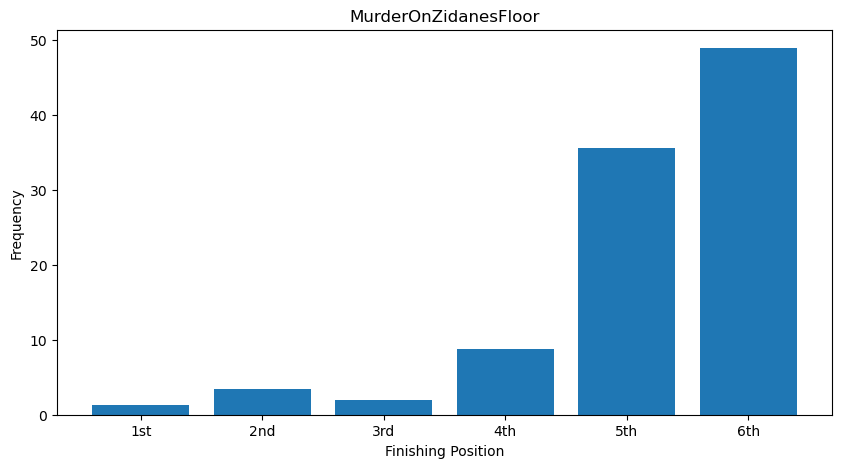

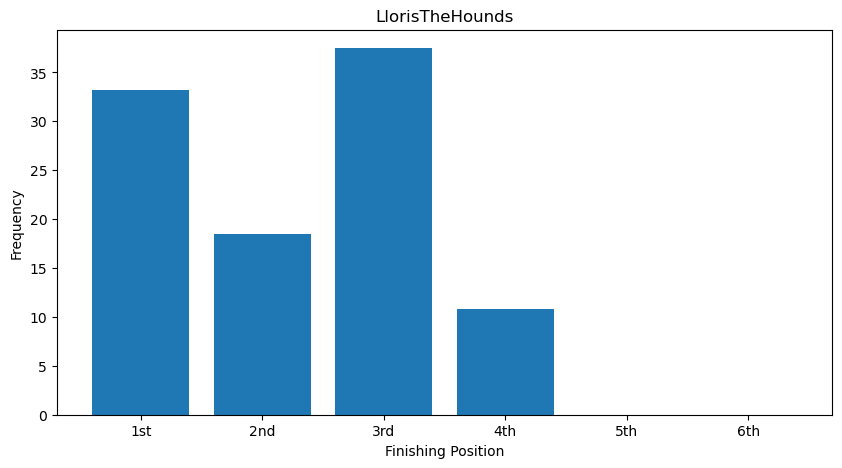

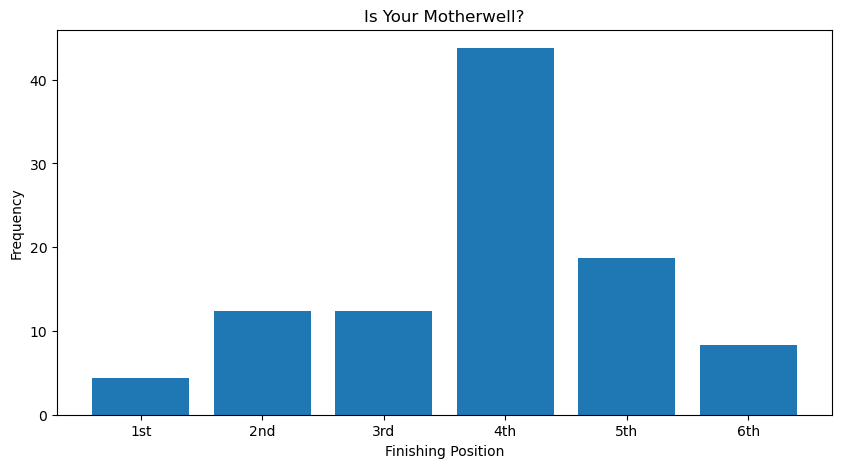

C:\Users\natha\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127973 (\N{HOSPITAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


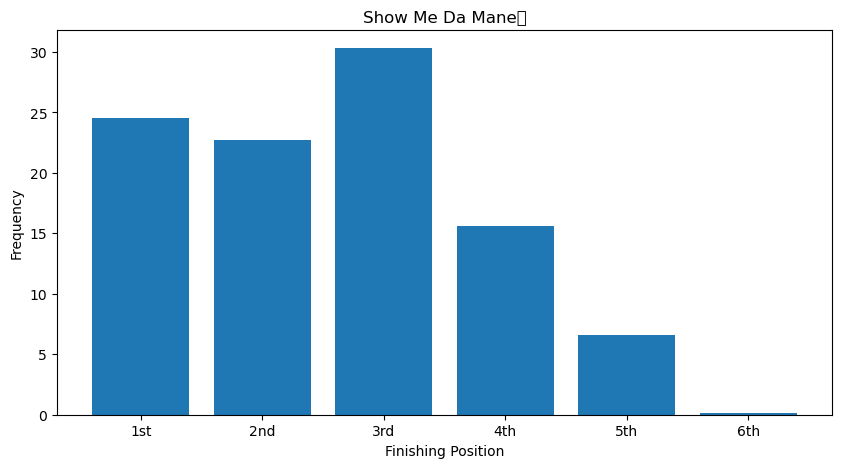

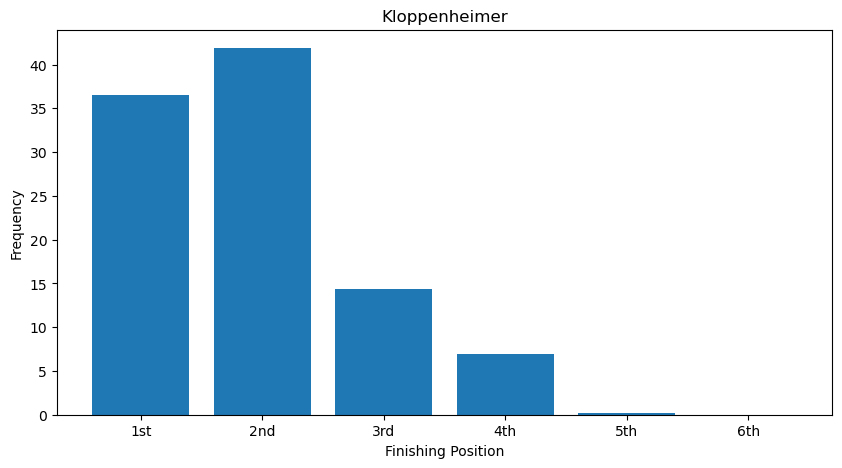

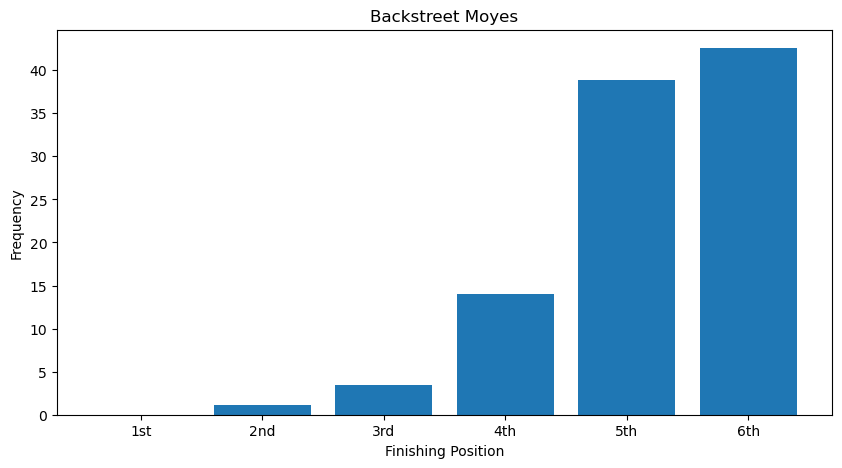

In [21]:
import matplotlib.pyplot as plt

for index, row in percentage_in_position.iterrows():
    plt.figure(figsize=(10,5))
    plt.bar(percentage_in_position.columns[1:], row[1:])
    plt.title(row[0])
    plt.xlabel('Finishing Position')
    plt.ylabel('Frequency')
    plt.show()


C:\Users\natha\AppData\Local\Temp\ipykernel_18876\1992251346.py:22: UserWarning: Glyph 127973 (\N{HOSPITAL}) missing from current font.
  plt.tight_layout()
C:\Users\natha\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127973 (\N{HOSPITAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


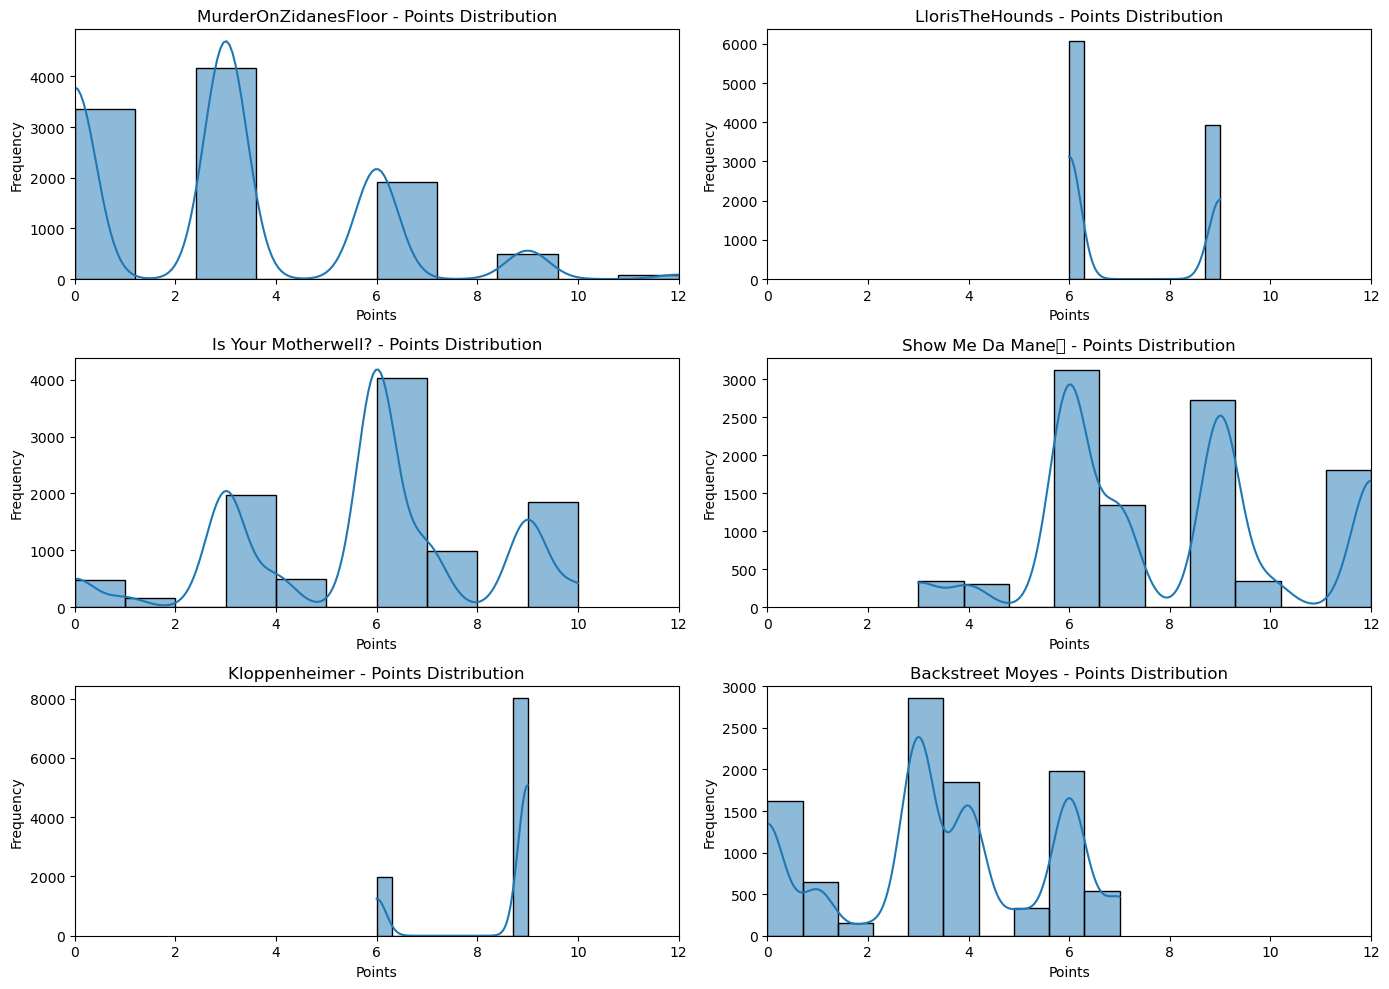

In [22]:
# Attempting to generate the histograms again
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()

# Plot histograms for each player
for i, (player, points) in enumerate(points_per_run.items()):
    sns.histplot(points, bins=10, kde=True, ax=axes[i])
    axes[i].set_title(f'{player} - Points Distribution')
    axes[i].set_xlabel('Points')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlim([0, 12])


# Remove any unused subplots
for i in range(len(points_per_run), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


TypeError: Object of type int64 is not JSON serializable